![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Algoritmos de Regresión I

## Regresión Lineal Simple

La regresión lineal es un método estadístico que se utiliza para modelar la relación entre una variable dependiente y una independiente. La regresión lineal busca encontrar una recta que mejor se ajusta a los datos.

La ecuación de la regresión lineal simple

$$
y = mx + b
$$

- *y*: es la variable dependiente (a predecir)
- *x*: variable independiente (para predecir)
- *m*: pendiente de la línea
- *b*: ordenada al origen

El objetivo de la regresión lineal es encontrar los coeficientes *m* y *b* que minimizan la suma de los cuadrados de las diferencias entre las observaciones reales y las predicciones de la línea.

![Geeks for geeks](https://media.geeksforgeeks.org/wp-content/uploads/20190415230935/average-fitted-model1.png)

#### ¿En qué momento se debe de utilizar?

Algunas de las aplicaciones más comunes de la regresión lineal son:

- **Predicción**: Se puede utilizar para predecir el valor de una variable dependiente. Por ejemplo, se puede utilizar para predecir el precio de una casa a partir de su tamaño o ubicación.
- **Comparación**: Se puede utilizar para comparar el impacto de diferentes variables independientes. Por ejemplo, para comparar el impacto de la publicidad en línea y la publicidad televisiva sobre las ventas de un producto.
- **Evaluación**: Se puede utilizar para evaluar la efectividad de una intervención. Por ejemplo, para evaluar el impacto de un programa de educación sobre el rendimiento académico de los estudiantes.

#### Ventajas y desventajas

**Ventajas**

1. **Simplicidad**: Simple y fácil de implementar e interpretar.
2. **Eficiente**: El cálculo de los coeficientes se puede realizar de manera eficiente, además de que se puede utilizar en una amplia gama de aplicaciones.

**Desventajas**
1. **Limitada a relaciones lineales**: Supone que la relación entre las variables es lineal.
2. **Sensible a los valores atípicos (Outliers)**: Puede ser sensible a valores atípicos en los datos.

## Problema

En este problema tenemos los datos de una empresa en donde se muestran las ventas obtenidas en base a la publicidad hecha en distintos medios. El objetivo es desarrollar un algoritmo que nos sirva para encontrar cuales son los mejores para hacer publicidad que nos lleve a tener buenas ventas.

In [2]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# acceso al drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
# leemos el dataset
data = pd.read_csv('/content/drive/MyDrive/samples/publicidad.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
data = data.iloc[:, 1:]
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Radio      200 non-null    float64
 1   Newspaper  200 non-null    float64
 2   Sales      200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [7]:
data.describe()

,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000
mean,23.264000,30.554000,14.022500
std,14.846809,21.778621,5.217457
min,0.000000,0.300000,1.600000
25%,9.975000,12.750000,10.375000
50%,22.900000,25.750000,12.900000
75%,36.525000,45.100000,17.400000
max,49.600000,114.000000,27.000000


In [8]:
data.columns

Index(['Radio', 'Newspaper', 'Sales'], dtype='object')

El objetivo del algoritmo que desarrollemos será para encontrar el valor de la columna `Sales`, por lo que esta variable sera nuestra columna dependiente y las demás son nuestras variables independientes.

Ahora que sabemos eso podemos comenzar a trabajar en cada una de las columnas, lo primero que haremos sera graficar los datos que podemos encontrar en cada una de ellas.

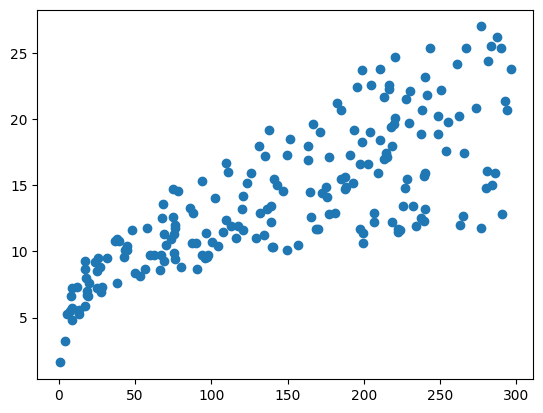

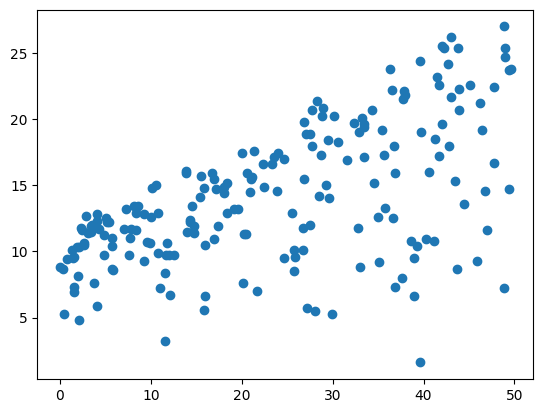

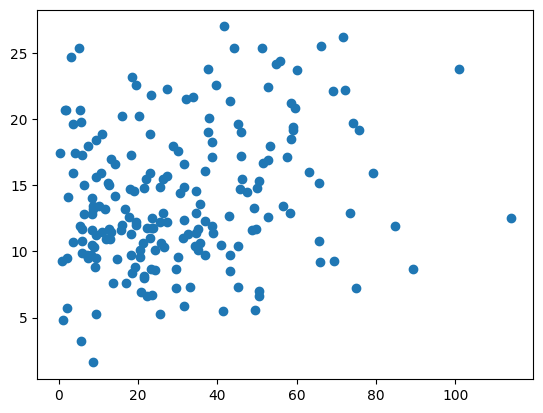

In [12]:
# hacemos un grafico de cada variable independiente en funcion de las ventas.
columnas = ['TV', 'Radio', 'Newspaper']

for columna in columnas:
  plt.plot(data[columna], data['Sales'], 'o')
  plt.show()

### Creación de los modelos de regresión lineal simple

Primero crearemos los modelos de regresión lineal simple utilizando cada una de las variables independientes de nuestro conjunto de datos.

### TV

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
x = data[['TV']].values.reshape(-1, 1)

In [21]:
x[:3]

array([[230.1],
       [ 44.5],
       [ 17.2]])

In [22]:
y = data['Sales'].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x.shape

(200, 1)

In [27]:
x_test.shape

(40, 1)

In [28]:
x_train.shape

(160, 1)

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = lin_reg.predict(x_test)

In [31]:
print(f"Predicciones: {y_pred[:4]}")
print(f"Valores reales: {y_test[:4]}")

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631]
Valores reales: [16.9 22.4 21.4  7.3]


**Calificar nuestro modelos**

RMSE nos indica cuánto varían en promedio las predicciones del modelo con respecto a los valores reales. Un valor más bajo de RMSE indica una mejor precisión del modelo, ya que significa que las predicciones están más cercanas a los valores reales.

Para poder entender el valor de RMSE debemos de entender primero la escala de los valores con los que estamos trabajando, en este caso nos estamos trabajando con los valores de la columna `Sales`. En el caso del valor RMSE del modelo tomando en cuenta la variable independiente `TV` vemos que el valor mínimo en la columna `Sales` es significativamente menor que el RMSE. Esto indica que, en promedio las predicciones tienen un error considerable en comparación con el rango de los datos. En estos casos es útil entender por qué el modelo tiene dificultades para hacer predicciones precisas, especialmente si el error absoluto es grande en relación con los valores mínimos de `Sales`.

La función retorna la raíz cuadrada del error cuadrático medio en lugar del propio error cuadrático medio. Esto es específico para el cálculo del RMSE en lugar del MSE. Si se omite np.sqrt, devolverá el MSE.

In [32]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
#

RMSE: 3.194472431998898


In [33]:
# R2  67%
r2_score(y_test, y_pred)


0.6766954295627076

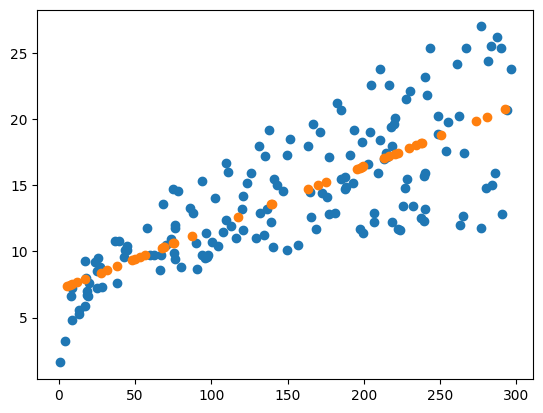

In [34]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_pred, 'o')
plt.show()

Vamos a ver Diario y Radio

In [36]:
def modelo_simple(independiente: str, dependiente: str)-> None:

  x = data[independiente].values.reshape(-1,1)
  y = data[dependiente].values

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  lin_reg = LinearRegression()

  lin_reg.fit(x_train, y_train)

  y_pred = lin_reg.predict(x_test)

  print(f'predicciones: {y_pred[:4]}, valores reales: {y_test[:4]}')

  r_squared = lin_reg.score(x_test, y_test) # R^2
  rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #RMSE
  print('R2', r_squared, "RMSE", rmse)

  print('R2', r2_score(y_test, y_pred))

  plt.plot(x_test, y_test, 'ro')
  plt.plot(x_test, y_pred.reshape(-1,1))
  plt.show()

predicciones: [15.88332197 19.17427219 15.20877938 16.96667826], valores reales: [16.9 22.4 21.4  7.3]
R2 0.2634309396999791 RMSE 4.8216974799471926
R2 0.2634309396999791


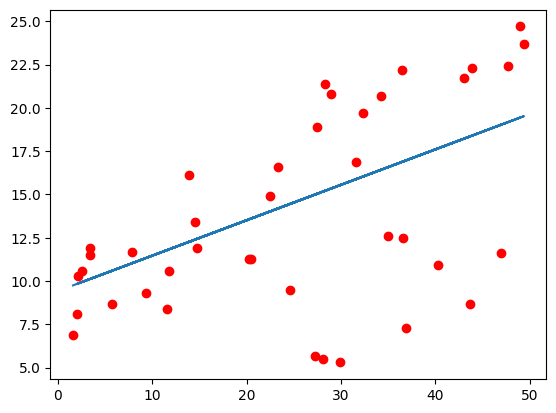

In [37]:
# para la radio

modelo_simple('Radio', 'Sales')

Los resultados obtenidos por cada uno de los modelos son los siguientes:
- TV: **R2**: 0.6766954295627076 **RMSE**: 3.194472431998898
- Radio: **R2**: 0.2634309396999791 **RMSE**: 4.8216974799471926
- Periodico: **R2**: 0.029871749149522397 **RMSE**: 5.533600454969853

Con base a los resultados podemos decir que el mejor modelo cuando utilizamos una sola variable independiente es el de **TV**, seguido por el de **Radio** y el que peor rendimiento muestra es el del **Diario**.

Conociendo los resultados de los modelos podemos ahora a la creación del modelo de regresión lineal múltiple haciendo distintas combinaciones de las variables del conjunto, con esta combinación de variables veremos si podemos conseguir un modelo que tenga un mejor rendimiento con los datos que se tienen.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Regresión Lineal Múltiple

Es una extensión de la regresión lineal simple, donde se busca modelar la relación entre la variable dependiente y dos o más variables independiente.

La ecuación de la regresión lineal múltiple es:

$$
y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n + x_n + 𝜀
$$

- *y*: es la variable dependiente
- $b_0$: es la ordenada al origen (intercepto)
- $b_1, b_2, ..., b_n$: son los coeficientes de las variables predictoras $x_1, x_2, ..., x_n$
- $𝜀$: representa el término de error

La regresión lineal múltiple encontrando los coeficientes ($b_0, b_1, ..., b_n$) que minimizan la suma de los cuadrados de las diferencias entre las observaciones reales y las predicciones del modelo.

#### Ventajas y desventajas

**Ventajas**

1. **Modelo más completo**: Permite modelar relaciones más complejas al considerar múltiples variables predictoras
2. **Sencilla**: Es una técnica relativamente sencilla de entender y utilizar

**Desventajas**

1. **Sensibilidad a Multicolinealidad**: La multicolinealidad (correlación alta entre variables predictoras) puede afectar la estabilidad de los coeficientes estimados.
2. **Puede sufrir Overfitting**: Si se incluyen demasiadas variables predictoras sin justificación, el modelo puede sobreajustarse (overfitting) a los datos de entrenamiento y tener un rendimiento deficiente en nuevos datos.

In [41]:
x = data.drop(['Newspaper', 'Sales'], axis=1).values
y = data['Sales']

In [42]:
x[:3]

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9]])

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [46]:
y_predict = lin_reg.predict(x_test)

In [47]:
# rmSE
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"RMSE: {rmse}")

RMSE: 1.7714254173033515


In [48]:
# r2
r2_score(y_test, y_predict)

0.9005833101920356

Los resultados obtenidos por cada uno de los modelos son los siguientes:
- *TV - Newspaper*: **R2**: 0.649515280538585 **RMSE**: 3.3260422878644853
- *TV - Radio*: **R2**: 0.9005833101920356 **RMSE**: 1.7714254173033515

Con base a los resultados podemos decir que el mejor modelo cuando utilizamos **TV - Radio**.

Conclusion: